# <b> JPMC Team #1: Company Relationship Analysis Tool </b>

In [3]:
def collatz_steps(n):
    steps = 0
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        steps += 1
    return steps

# Test the function
number = int(input("Enter a number: "))
print("Number of steps to reach 1:", collatz_steps(number))


In [1]:
import os
import pandas as pd
import numpy as np

In [1]:
a = 1/4
a

0.25

In [2]:
#use yfinance to get stock data
import yfinance as yf
# make a price percentage change dataframe of stock data for each ticker in the year 2022
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    stock_data = stock.history(period='1y', interval='1d')
    stock_data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
    stock_data['price_pct_change'] = stock_data['Close'].pct_change()
    stock_data = stock_data.dropna()
    return stock_data



In [3]:
#run the stocks through the function and get the dataframes for each stock
stock_data = get_stock_data('AAPL')
stock_data2 = get_stock_data('MSFT')
stock_data3 = get_stock_data('AMZN')

#combine all the dataframes into one dataframe
stock_data = pd.concat([stock_data, stock_data2, stock_data3], axis=0)
stock_data


,Open,High,Low,Close,Volume,price_pct_change
Date,,,,,,
2023-02-07 00:00:00-05:00,149.802685,154.367168,149.802685,153.790390,83322600,0.019245
2023-02-08 00:00:00-05:00,153.024674,153.720780,150.329730,151.075562,64120100,-0.017653
2023-02-09 00:00:00-05:00,152.925231,153.472177,149.583907,150.031403,56007100,-0.006912
2023-02-10 00:00:00-05:00,148.856162,150.728556,148.617126,150.399887,57450700,0.002456
2023-02-13 00:00:00-05:00,150.340146,153.636771,150.310269,153.228439,62199000,0.018807
...,...,...,...,...,...,...
2024-01-31 00:00:00-05:00,157.000000,159.009995,154.809998,155.199997,50284400,-0.023899
2024-02-01 00:00:00-05:00,155.869995,159.759995,155.619995,159.279999,76542400,0.026289
2024-02-02 00:00:00-05:00,169.190002,172.500000,167.330002,171.809998,117154900,0.078666


In [4]:
#filename = "/Users/annahauk/Desktop/Machine Learning/SP500AdjPrice.csv"
filename = os.path.join(os.getcwd(), "SP500AdjPrice.csv")
df = pd.read_csv(filename, header = 0)

In [5]:
data    = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S%26P_500_component_stocks')
table_symbol   = data[0]
table_industry = data[0]['GICS Sector']

#these 2 lists are in order with one another
symbols = list(table_symbol.Symbol.values)
industries = list(table_industry.values) ##Industry Sector

remove = []

symbols_to_remove = ['BF.B', 'BRK.B', 'KVUE', 'VLTO','SPY']

for i, symbol in enumerate(symbols):
    if symbol in symbols_to_remove:
        remove.append(i)
#print(remove)

#list(set(industries))

for i in remove:
    symbols.remove(symbols[i])
    industries.remove(industries[i])

#print(len(symbols))
#print(set(industries))

symbol_industry = dict(zip(symbols,industries))

df_industries = pd.DataFrame({'Industry': [symbol_industry[symbol] for symbol in symbols]})
df_industries.index = symbol_industry.keys()
df_industries = df_industries.sort_index()
df_industries.head(10)

#for i in industries:
    

,Industry
A,Consumer Discretionary
AAL,Real Estate
AAPL,Consumer Staples
ABBV,Information Technology
ABNB,Materials
ABT,Health Care
ACGL,Financials
ACN,Information Technology
ADBE,Information Technology
ADI,Information Technology


In [6]:
a = len(symbols)

df.index = sorted(symbols)
df = df.drop(columns = "Unnamed: 0", axis = 1)

In [7]:
df.head()

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17,Adj Close 2023-03-20
A,140.885956,143.133453,142.437317,139.553360,140.120193,138.161102,134.968872,135.933502,137.634033,133.288239,136.062790,132.442917,133.795410
AAL,16.120001,16.360001,16.120001,16.360001,16.590000,15.880000,15.460000,14.850000,14.660000,13.860000,14.120000,13.980000,13.960000
AAPL,145.511978,150.617996,153.410370,151.186447,152.452972,150.179184,148.094894,150.059525,152.173737,152.572647,155.424850,154.577164,156.970612
ABBV,151.295471,152.941910,152.177490,149.874420,146.610977,144.405930,146.718781,148.914017,150.776062,150.981857,152.197098,151.138672,153.000702
ABNB,122.379997,125.730003,126.330002,126.940002,125.000000,119.839996,118.300003,115.959999,116.360001,113.580002,119.989998,118.150002,118.400002


In [8]:
dictionary = dict(zip(symbols,industries))

## Don't need this -- use dataframe instead of dictionary

In [9]:
b = []
unique_industries = list(set(dictionary.values()))
#for i in unique_industries:
    #print(i)
# Initialize lists within the list for each unique industry
for _ in unique_industries:
    b.append([])

# Append companies to their respective industry lists
for key, value in dictionary.items():
    index = unique_industries.index(value)
    b[index].append(key)

* Consumer Discretionary = 0
* Information Technology = 1
* Materials = 2
* Real Estate = 3
* Utilities = 4
* Financials = 5
* Communication Services = 6
* Industrials = 7
* Energy = 8
* Consumer Staples = 9
* Health Care = 10

# <b> <font color = #f6308e > Percentage Price Change Per Day </b> 

In [10]:
df_price = df.T
df_price_pct = df_price.pct_change()[1:]
#finds percent change between current price and prior
df_price_pct.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Adj Close 2023-03-03,0.015953,0.014888,0.035090,0.010882,0.027374,0.017734,0.005642,0.014853,0.031604,0.008993,...,0.021339,0.011812,0.012657,0.028132,0.016332,0.007693,0.026262,0.011076,0.019044,0.011745
Adj Close 2023-03-06,-0.004864,-0.014670,0.018539,-0.004998,0.004772,-0.016276,0.005610,0.001597,0.008662,-0.003919,...,-0.003712,-0.000768,0.008865,0.013681,-0.003368,-0.002853,-0.012676,-0.011763,-0.009547,-0.005218
Adj Close 2023-03-07,-0.020247,0.014888,-0.014497,-0.015134,0.004829,-0.026959,-0.009902,-0.020139,-0.006397,-0.003126,...,-0.019411,-0.022137,-0.019331,-0.017316,-0.013517,-0.018407,-0.011796,-0.011935,-0.047580,-0.015560
Adj Close 2023-03-08,0.004062,0.014059,0.008377,-0.021775,-0.015283,-0.005801,-0.009861,-0.002044,0.003016,0.008814,...,0.003358,0.012419,-0.014604,-0.016585,-0.003915,-0.001103,-0.010069,0.016250,0.005168,0.009639
Adj Close 2023-03-09,-0.013982,-0.042797,-0.014915,-0.015040,-0.041280,-0.015594,-0.027173,-0.014792,-0.021600,-0.016133,...,-0.034437,-0.002329,-0.007729,-0.022661,-0.012676,-0.005758,0.003609,-0.033087,-0.113967,-0.006819


In [11]:
df_price_pct.T.isnull().any()

Adj Close 2023-03-03    False
Adj Close 2023-03-06    False
Adj Close 2023-03-07    False
Adj Close 2023-03-08    False
Adj Close 2023-03-09    False
Adj Close 2023-03-10    False
Adj Close 2023-03-13    False
Adj Close 2023-03-14    False
Adj Close 2023-03-15    False
Adj Close 2023-03-16    False
Adj Close 2023-03-17    False
Adj Close 2023-03-20    False
dtype: bool

# <b> <font color = #56beba > Correlations Between Stocks </b> 

In [12]:
price_corr = df_price_pct.corr()
price_corr.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.518884,0.791646,0.374019,0.633630,0.810017,0.844036,0.907142,0.633080,0.872986,...,0.769744,0.302473,0.665964,0.743984,0.842873,0.723940,0.581283,0.822347,0.232826,0.829995
AAL,0.518884,1.000000,0.363977,-0.151065,0.736561,0.168846,0.642950,0.615690,0.609986,0.667913,...,0.739896,-0.394522,0.452224,0.273454,0.530967,0.064474,0.102182,0.648352,0.545734,0.338238
AAPL,0.791646,0.363977,1.000000,0.431610,0.610113,0.781189,0.553827,0.815994,0.691611,0.642086,...,0.712923,0.532876,0.515754,0.803460,0.644941,0.761709,0.446678,0.716757,0.305478,0.782668
ABBV,0.374019,-0.151065,0.431610,1.000000,0.339878,0.705050,0.322698,0.290109,0.224160,0.327988,...,0.359326,0.294439,0.311518,0.674333,0.404990,0.548515,0.709122,0.218784,0.018602,0.133277
ABNB,0.633630,0.736561,0.610113,0.339878,1.000000,0.482641,0.751249,0.783877,0.845854,0.700262,...,0.805317,-0.174714,0.398855,0.569476,0.545922,0.349104,0.265397,0.693478,0.571563,0.435598


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
set(industries)

{'Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities'}

In [15]:
df = df.join(df_industries)

# <b> Looking at Correlation between daily stock returns </b>

In [16]:
df.tail()

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17,Adj Close 2023-03-20,Industry
YUM,127.485069,128.465866,128.099319,125.741402,125.602715,124.879494,123.423141,123.730255,125.523445,125.949463,126.870819,125.672058,127.683220,Consumer Discretionary
ZBH,122.286400,125.497932,123.907082,122.445480,121.212585,121.650070,122.823318,123.539192,125.905579,124.543419,124.712440,123.598854,125.607292,Health Care
ZBRA,306.059998,309.450012,305.809998,302.160004,307.070007,296.910004,288.190002,284.920013,292.459991,287.739990,294.929993,288.709991,290.839996,Information Technology
ZION,46.931580,47.825329,47.368736,45.114933,45.348087,40.179882,39.198696,29.114870,30.416636,29.833755,31.193810,29.085726,29.318878,Financials
ZTS,167.849579,169.820999,168.934845,166.306290,167.909317,166.764313,160.830124,162.701996,163.846985,162.861298,165.589417,163.757385,165.101547,Health Care


In [17]:
df2 = df.drop(columns= 'Industry', axis = 1)
a = df2.iloc[:, : 5]
b = df2.iloc[:, :30:6]
b

,Adj Close 2023-03-02,Adj Close 2023-03-10,Adj Close 2023-03-20
A,140.885956,134.968872,133.795410
AAL,16.120001,15.460000,13.960000
AAPL,145.511978,148.094894,156.970612
ABBV,151.295471,146.718781,153.000702
ABNB,122.379997,118.300003,118.400002
...,...,...,...
YUM,127.485069,123.423141,127.683220
ZBH,122.286400,122.823318,125.607292
ZBRA,306.059998,288.190002,290.839996
ZION,46.931580,39.198696,29.318878


In [18]:
x_labels = df2.T.index
x_labels = [label.split(' ')[-1] for label in x_labels]
print(x_labels)

['2023-03-02', '2023-03-03', '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10', '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-20']


In [20]:
selected_stocks = ['A', 'ACGL', 'ADSK', 'AIZ', 'ALL']
df_selected = df.T[selected_stocks]
df_selected = df_selected.T
df_selected = df_selected.drop(columns= 'Industry', axis = 1)
df_selected

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17,Adj Close 2023-03-20
A,140.885956,143.133453,142.437317,139.55336,140.120193,138.161102,134.968872,135.933502,137.634033,133.288239,136.06279,132.442917,133.79541
ACGL,70.900002,71.300003,71.699997,70.989998,70.290001,68.379997,66.610001,65.18,67.339996,62.740002,66.07,63.150002,65.610001
ADSK,201.130005,207.460007,208.330002,205.479996,204.509995,200.490005,194.020004,197.869995,199.220001,195.789993,200.589996,199.110001,200.419998
AIZ,124.48246,125.105827,122.780617,120.257523,120.772034,118.615036,115.518066,111.80764,112.242996,110.046417,109.799065,103.812897,110.016739
ALL,47.98,48.439999,47.900002,48.509998,49.209999,47.52,46.099998,44.080002,42.259998,40.380001,40.48,39.290001,39.27


In [21]:
x_labels2 = [str(date) for date in df_selected.T.index]
x_labels2

['Adj Close 2023-03-02',
 'Adj Close 2023-03-03',
 'Adj Close 2023-03-06',
 'Adj Close 2023-03-07',
 'Adj Close 2023-03-08',
 'Adj Close 2023-03-09',
 'Adj Close 2023-03-10',
 'Adj Close 2023-03-13',
 'Adj Close 2023-03-14',
 'Adj Close 2023-03-15',
 'Adj Close 2023-03-16',
 'Adj Close 2023-03-17',
 'Adj Close 2023-03-20']

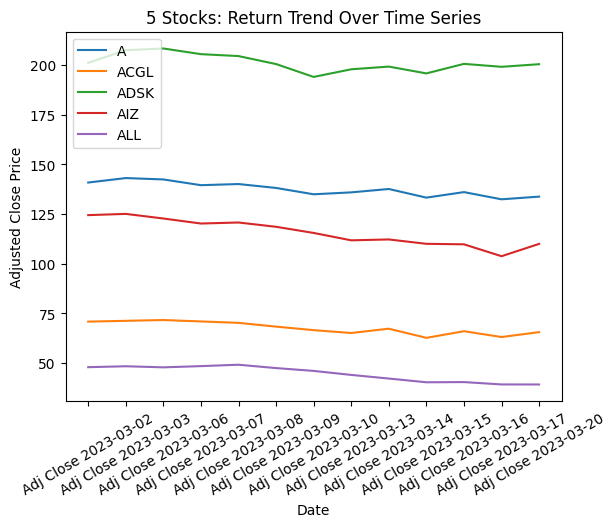

In [22]:
# Plotting the data
plt.plot(df_selected.T)
plt.title('5 Stocks: Return Trend Over Time Series')
plt.legend(selected_stocks, loc=2)
x_ticks = np.arange(0, len(x_labels2))

plt.xticks(x_ticks, x_labels2, rotation=30)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

In [23]:
c = df.loc['AIZ', df.columns[-1]]
print(c)
d = df.loc['ALL', df.columns[-1]]
print(d)

Industrials
Consumer Discretionary


In [55]:
df_comp = df_selected.T
df_comp
corr1 = df_comp.corr()
corr1

,A,ACGL,ADSK,AIZ,ALL
A,1.000000,0.956052,0.818825,0.930526,0.847051
ACGL,0.956052,1.000000,0.801281,0.936821,0.878634
ADSK,0.818825,0.801281,1.000000,0.660313,0.567625
AIZ,0.930526,0.936821,0.660313,1.000000,0.928923
ALL,0.847051,0.878634,0.567625,0.928923,1.000000


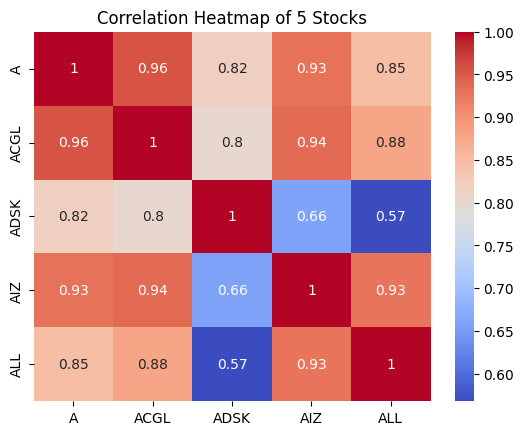

In [56]:
# heatmap of df_comp
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of 5 Stocks')
plt.show()


In [52]:
# correlation between AIZ and ALL
selected_stocks_corr = df_selected.corr()
selected_stocks_corr

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17,Adj Close 2023-03-20
Adj Close 2023-03-02,1.000000,0.999820,0.999330,0.998875,0.999153,0.999349,0.999500,0.998051,0.997902,0.998496,0.996998,0.994469,0.997356
Adj Close 2023-03-03,0.999820,1.000000,0.999818,0.999582,0.999751,0.999832,0.999855,0.998914,0.998635,0.999232,0.998023,0.996070,0.998355
Adj Close 2023-03-06,0.999330,0.999818,1.000000,0.999927,0.999924,0.999912,0.999844,0.999450,0.999278,0.999689,0.998955,0.997497,0.999250
Adj Close 2023-03-07,0.998875,0.999582,0.999927,1.000000,0.999933,0.999838,0.999675,0.999533,0.999231,0.999702,0.999086,0.997968,0.999407
Adj Close 2023-03-08,0.999153,0.999751,0.999924,0.999933,1.000000,0.999969,0.999864,0.999560,0.999128,0.999707,0.998839,0.997574,0.999080
Adj Close 2023-03-09,0.999349,0.999832,0.999912,0.999838,0.999969,1.000000,0.999962,0.999562,0.999175,0.999719,0.998774,0.997352,0.998946
Adj Close 2023-03-10,0.999500,0.999855,0.999844,0.999675,0.999864,0.999962,1.000000,0.999503,0.999200,0.999680,0.998681,0.997080,0.998780
Adj Close 2023-03-13,0.998051,0.998914,0.999450,0.999533,0.999560,0.999562,0.999503,1.000000,0.999746,0.999955,0.999633,0.998911,0.999489
Adj Close 2023-03-14,0.997902,0.998635,0.999278,0.999231,0.999128,0.999175,0.999200,0.999746,1.000000,0.999812,0.999865,0.998939,0.999708
Adj Close 2023-03-15,0.998496,0.999232,0.999689,0.999702,0.999707,0.999719,0.999680,0.999955,0.999812,1.000000,0.999631,0.998676,0.999586


We see there is a correlation between AIZ and ALL since they follow eachother closely in the graph. Turns out, they're part of the same industry and we can calculate their correlation (later when we do Consumer Discretionary).

## <b> <font color = #f6308e > Information Technology </b> 
##### Technology and software development, hardware manufacturing, cloud computing, and IT services

In [24]:
it = df[df['Industry'] == 'Information Technology']
it.shape
#companies with IT as its industry


(64, 14)

In [25]:
it = it.drop(columns= 'Industry', axis = 1)
df_price_it = it.T
df_price_pct_it = df_price_it.pct_change()[1:]

price_corr_it = df_price_pct_it.corr()
price_corr_it.head()

,ABBV,ACN,ADBE,ADI,AJG,AMAT,AME,AMP,ANSS,APD,...,SYF,TEL,TFC,TFX,TGT,TRV,TSLA,VLTO,WDC,ZBRA
ABBV,1.000000,0.290109,0.224160,0.327988,0.286808,0.204176,0.012058,0.584923,0.008318,0.346366,...,0.141022,0.378967,0.256019,-0.094508,0.265016,0.015105,0.515066,0.202120,-0.016013,0.218784
ACN,0.290109,1.000000,0.850083,0.819936,0.908389,0.899310,0.505039,0.080078,0.796697,0.838236,...,0.855495,0.738004,0.763940,0.471910,0.653411,0.672471,0.457555,0.860431,0.813427,0.806578
ADBE,0.224160,0.850083,1.000000,0.730762,0.785043,0.744284,0.764165,-0.126735,0.839212,0.658104,...,0.765996,0.668578,0.580112,0.627957,0.723882,0.622682,0.545923,0.739843,0.802890,0.801995
ADI,0.327988,0.819936,0.730762,1.000000,0.855122,0.873199,0.669873,-0.064262,0.810843,0.796854,...,0.882638,0.709316,0.919668,0.239375,0.570621,0.518300,0.512907,0.865515,0.804478,0.913041
AJG,0.286808,0.908389,0.785043,0.855122,1.000000,0.901100,0.548096,-0.055655,0.774314,0.885259,...,0.816960,0.595971,0.745445,0.529445,0.464987,0.401268,0.479068,0.886737,0.765045,0.814880


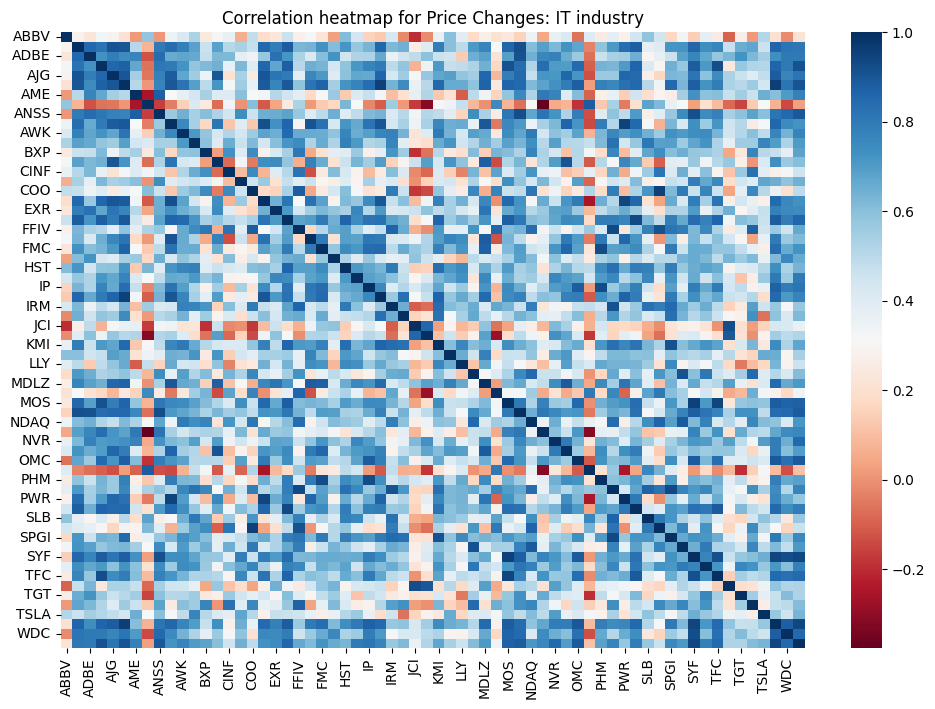

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(price_corr_it, cmap = 'RdBu').set_title("Correlation heatmap for Price Changes: IT industry")
plt.show()

## <b> <font color = #f6308e > Communication Services </b> 
##### Telecommunications, cable, broadcasting, and internet services

In [27]:
commserv = df[df['Industry'] == 'Communication Services']
commserv.shape
#companies with Communication Services as its industry

(21, 14)

In [28]:
commserv = commserv.drop(columns= 'Industry', axis = 1)
df_price_commserv = commserv.T
df_price_pct_commserv = df_price_commserv.pct_change()[1:]

price_corr_commserv = df_price_pct_commserv.corr()
price_corr_commserv.head()

,ADM,ALLE,CRL,CTSH,DIS,EIX,FTNT,FTV,IFF,LIN,...,MRK,NEM,NTAP,NWSA,ODFL,PANW,SYY,TROW,VRSK,WBD
ADM,1.000000,0.754429,0.597393,0.500351,0.670575,0.735245,0.614887,0.686806,0.687754,0.570813,...,0.673952,0.714229,0.718221,0.672344,0.837931,0.467362,0.525080,0.483316,0.691028,0.269291
ALLE,0.754429,1.000000,0.540329,0.539492,0.666796,0.829418,0.811277,0.482572,0.694154,0.631697,...,0.800775,0.392455,0.552817,0.233351,0.775011,0.342043,0.410738,0.477894,0.628039,0.257889
CRL,0.597393,0.540329,1.000000,0.592810,0.846001,0.834715,0.561576,0.819594,0.780946,0.949143,...,0.789053,0.544633,0.781312,0.397458,0.618002,0.739393,0.543542,0.586673,0.683080,0.835234
CTSH,0.500351,0.539492,0.592810,1.000000,0.786500,0.532796,0.589439,0.651324,0.653817,0.582719,...,0.506421,0.591371,0.450234,0.341963,0.428211,0.568708,0.809472,0.759715,0.500472,0.451311
DIS,0.670575,0.666796,0.846001,0.786500,1.000000,0.763738,0.626311,0.869930,0.818003,0.774594,...,0.704675,0.747235,0.624360,0.520585,0.597698,0.642579,0.669423,0.744452,0.706079,0.669167


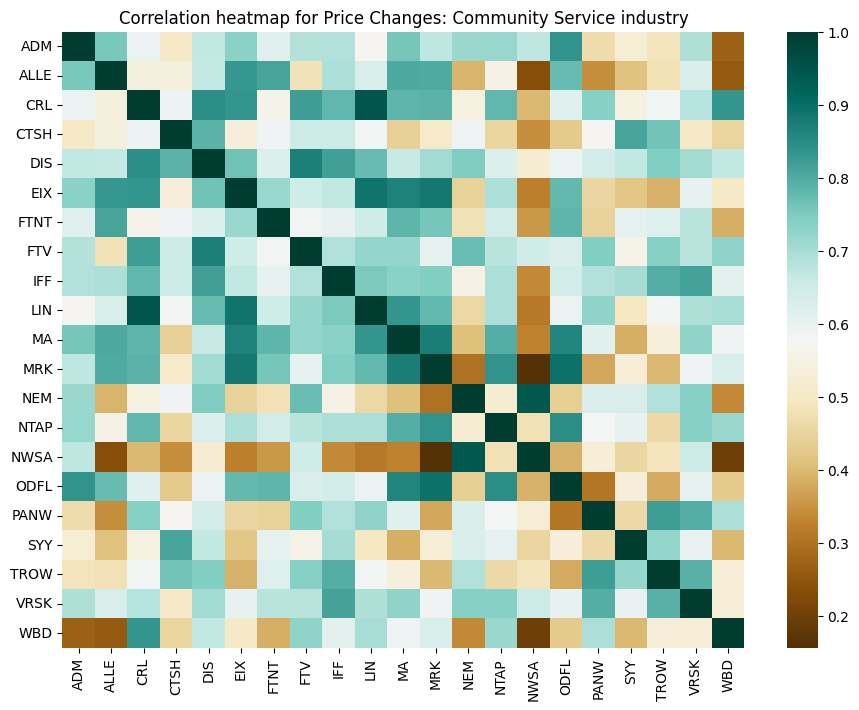

In [29]:
plt.figure(figsize=(11,8))
sns.heatmap(price_corr_commserv, cmap = 'BrBG').set_title("Correlation heatmap for Price Changes: Community Service industry")
plt.show()

## <b> <font color = #f6308e > Consumer Discretionary </b> 
##### Retail, automotive, entertainment, and hospitality

In [30]:
consume = df[df['Industry'] == 'Consumer Discretionary']
consume.shape

(53, 14)

In [31]:
consume = consume.drop(columns= 'Industry', axis = 1)
df_price_consume = consume.T



df_price_pct_consume = df_price_consume.pct_change()[1:]
# Calculate the correlation matrix
price_corr_consume = df_price_pct_consume.corr()
# Calculate 1 - |correlation|
complement_corr_consume = 1 - abs(price_corr_consume)

complement_corr_consume.head()

,A,ALL,AON,BBWI,BEN,BG,BKR,BLK,BX,CAH,...,T,TER,TJX,TMO,TTWO,UDR,VFC,WHR,WYNN,YUM
A,0.000000,0.621014,0.228894,0.203277,0.777098,0.269508,0.305397,0.238486,0.258996,0.511989,...,0.433526,0.105147,0.306493,0.348451,0.136926,0.329160,0.930449,0.162769,0.230256,0.276060
ALL,0.621014,0.000000,0.836614,0.664839,0.477533,0.632372,0.518671,0.392377,0.491765,0.820032,...,0.912072,0.641042,0.688967,0.686129,0.467638,0.856811,0.916325,0.529280,0.531484,0.949861
AON,0.228894,0.836614,0.000000,0.269390,0.954619,0.388835,0.574215,0.638695,0.628009,0.465473,...,0.331035,0.313729,0.315275,0.450122,0.559804,0.268721,0.709746,0.337976,0.499544,0.144119
BBWI,0.203277,0.664839,0.269390,0.000000,0.735888,0.258378,0.348704,0.372113,0.414010,0.606786,...,0.448037,0.123109,0.434834,0.328712,0.294172,0.174683,0.528015,0.146151,0.338766,0.259222
BEN,0.777098,0.477533,0.954619,0.735888,0.000000,0.539277,0.421225,0.484977,0.588399,0.589322,...,0.826336,0.768089,0.496473,0.453275,0.664454,0.813709,0.403203,0.743115,0.472169,0.663473


In [32]:
df_price_pct_consume

,A,ALL,AON,BBWI,BEN,BG,BKR,BLK,BX,CAH,...,T,TER,TJX,TMO,TTWO,UDR,VFC,WHR,WYNN,YUM
Adj Close 2023-03-03,0.015953,0.009587,0.009333,0.019107,0.030573,0.018238,0.016514,0.017975,0.002170,-0.000279,...,0.009398,0.010376,0.000362,0.015643,0.037356,0.020660,-0.001141,0.009238,0.021339,0.007693
Adj Close 2023-03-06,-0.004864,-0.011148,-0.005381,-0.017347,-0.011530,-0.012504,-0.002660,-0.000310,-0.010628,0.001953,...,0.001180,0.001073,-0.004819,0.004364,-0.010561,-0.002327,-0.053694,-0.010812,-0.003712,-0.002853
Adj Close 2023-03-07,-0.020247,0.012735,-0.023939,-0.022290,-0.000486,-0.033196,-0.013213,-0.016114,-0.005769,-0.002228,...,-0.009561,-0.013474,-0.014407,-0.016230,-0.006196,-0.024720,-0.023743,-0.018508,-0.019411,-0.018407
Adj Close 2023-03-08,0.004062,0.014430,0.004381,0.012402,-0.013494,0.013451,0.001539,-0.010079,0.001801,0.001954,...,-0.010315,0.005820,0.004238,0.002598,0.003091,0.006456,-0.009893,0.014774,0.003358,-0.001103
Adj Close 2023-03-09,-0.013982,-0.034343,-0.007964,-0.014772,-0.026494,-0.027943,-0.029998,-0.043589,-0.021770,-0.022841,...,-0.007082,-0.011959,-0.017553,-0.028634,-0.012431,-0.019957,-0.029933,-0.017851,-0.034437,-0.005758
Adj Close 2023-03-10,-0.023105,-0.029882,-0.013956,-0.039312,-0.004937,-0.009343,-0.009939,-0.032934,-0.021233,-0.001995,...,-0.015879,-0.027565,-0.015314,-0.008937,-0.015337,-0.032243,-0.053455,-0.021304,-0.011767,-0.011662
Adj Close 2023-03-13,0.007147,-0.043818,0.022700,-0.002284,-0.036128,-0.018861,-0.016771,-0.031992,-0.032958,0.002571,...,0.009845,-0.004095,-0.001644,-0.010229,-0.005962,0.008517,-0.043159,0.003121,-0.019291,0.002488
Adj Close 2023-03-14,0.012510,-0.041289,0.018332,0.010683,-0.012274,0.009982,0.015113,0.007818,0.026963,0.010826,...,0.010968,0.020077,0.002850,0.016590,0.021776,0.009439,-0.004798,0.001290,0.019577,0.014493
Adj Close 2023-03-15,-0.031575,-0.044486,0.002141,-0.016610,0.009487,-0.015373,-0.024243,-0.053244,-0.035707,0.005355,...,0.004286,-0.020394,0.004799,-0.008026,-0.055632,-0.001968,0.027965,-0.024172,-0.032032,0.003394
Adj Close 2023-03-16,0.020816,0.002476,0.016572,0.000384,0.020384,0.002231,0.010009,0.016760,0.022435,0.005887,...,-0.006402,0.007908,0.024634,0.005933,0.014503,-0.015039,0.003283,0.005280,0.024604,0.007315


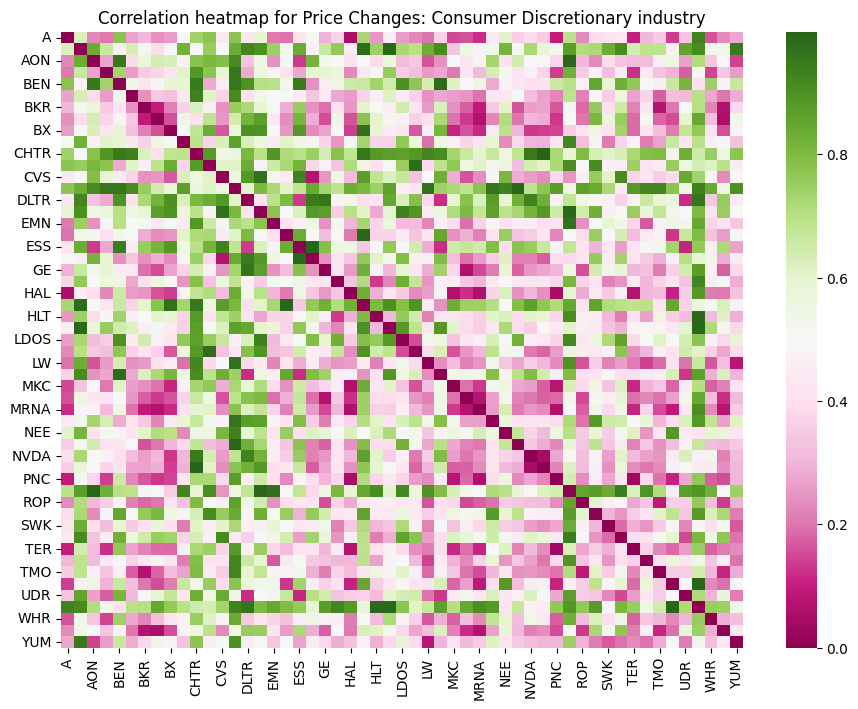

In [33]:
plt.figure(figsize=(11,8))
sns.heatmap(complement_corr_consume, cmap = 'PiYG').set_title("Correlation heatmap for Price Changes: Consumer Discretionary industry")
plt.show()
#RdBu

## <b> <font color = #f6308e > Consumer Staples </b> 
##### Food, beverages, household goods, and personal care items,

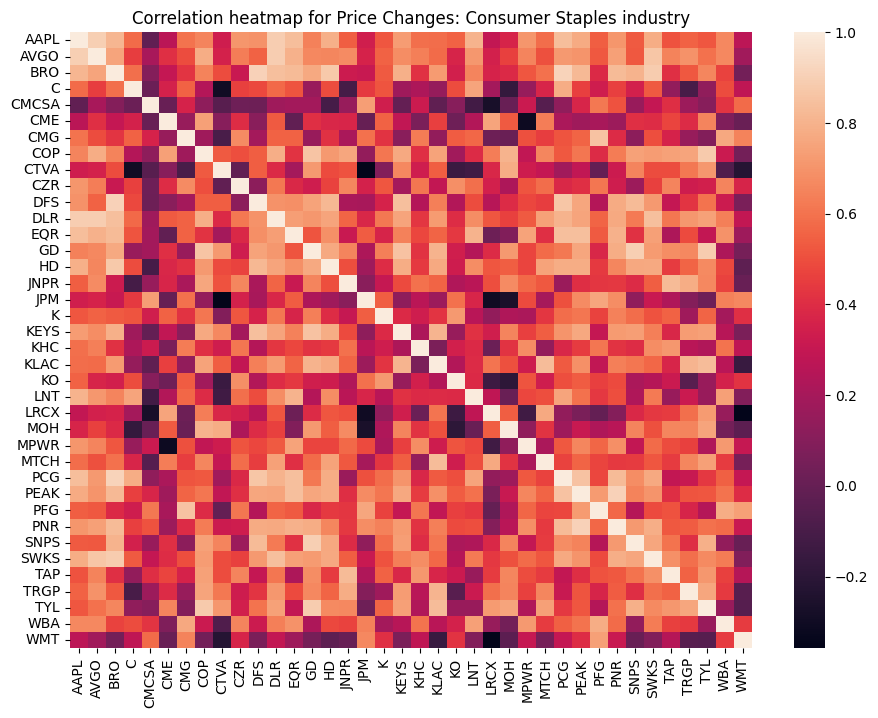

In [34]:
staples = df[df['Industry'] == 'Consumer Staples']
staples = staples.drop(columns= 'Industry', axis = 1)
df_price_staples = staples.T
df_price_pct_staples = df_price_staples.pct_change()[1:]

price_corr_staples = df_price_pct_staples.corr()
plt.figure(figsize=(11,8))
sns.heatmap(price_corr_staples).set_title("Correlation heatmap for Price Changes: Consumer Staples industry")
plt.show()

## <b> <font color = #f6308e > Energy </b> 
##### oil, natural gas, and renewable energy sources


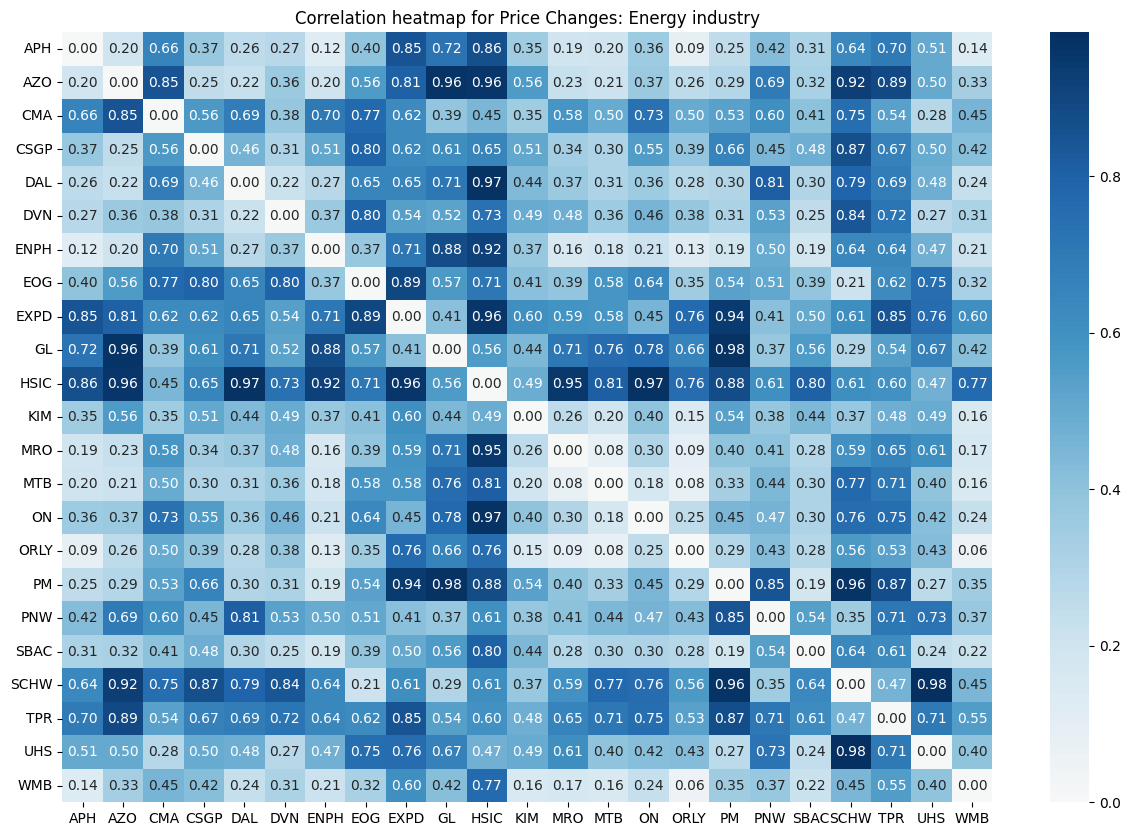

In [35]:
energy = df[df['Industry'] == 'Energy']
energy = energy.drop(columns='Industry', axis=1)
df_price_energy = energy.T
df_price_pct_energy = df_price_energy.pct_change()[1:]

# Modify correlation calculation
price_corr_energy = 1 - abs(df_price_pct_energy.corr())

plt.figure(figsize=(15, 10))
sns.heatmap(price_corr_energy, cmap='RdBu', center=0, annot=True, fmt=".2f").set_title("Correlation heatmap for Price Changes: Energy industry")
plt.show()

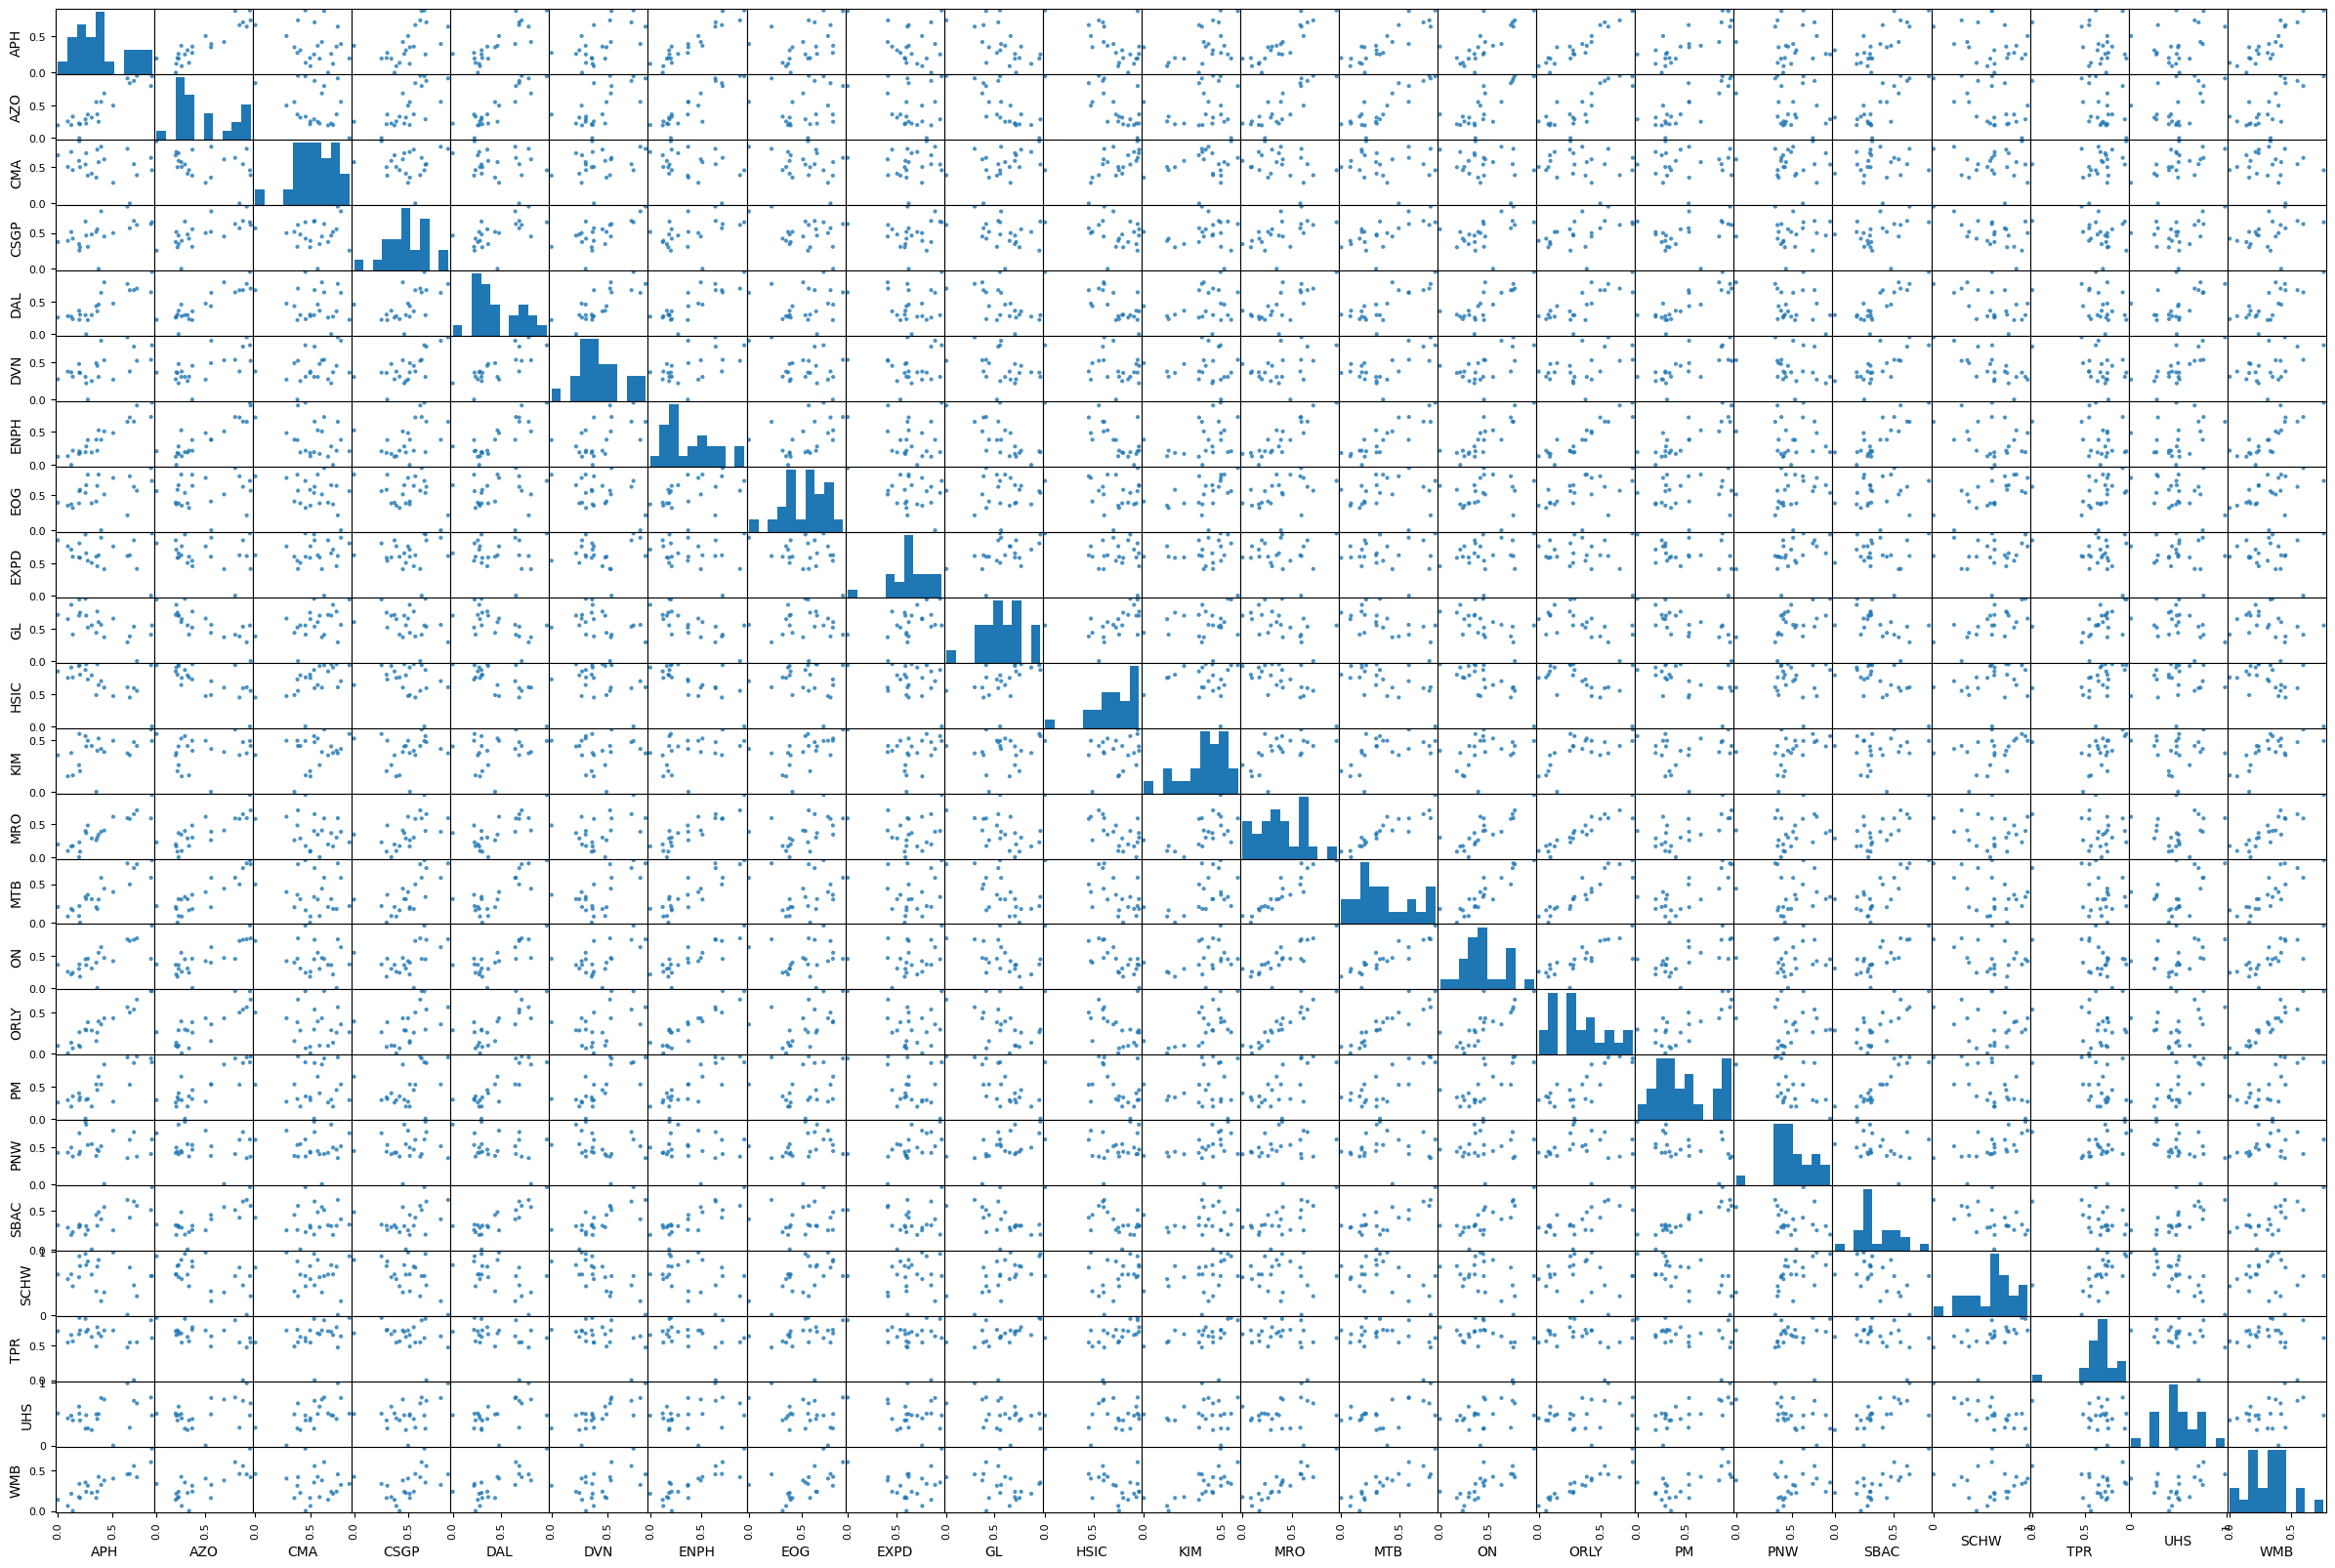

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(price_corr_energy, figsize=(30,20),alpha = 0.8)
plt.show()

## <b> <font color = #f6308e > Financials </b> 
##### money management, lending, and insurance

In [37]:
'''
fin = df[df['Industry'] == 'Financials']
fin = fin.drop(columns= 'Industry', axis = 1)
df_price_fin = fin.T
df_price_pct_fin = df_price_fin.pct_change()[1:]

price_corr_fin = df_price_pct_fin.corr()
plt.figure(figsize=(11,8))
sns.heatmap(price_corr_fin, cmap = 'plasma').set_title("Correlation heatmap for Price Changes: Financials industry")
plt.show()
'''

'\nfin = df[df[\'Industry\'] == \'Financials\']\nfin = fin.drop(columns= \'Industry\', axis = 1)\ndf_price_fin = fin.T\ndf_price_pct_fin = df_price_fin.pct_change()[1:]\n\nprice_corr_fin = df_price_pct_fin.corr()\nplt.figure(figsize=(11,8))\nsns.heatmap(price_corr_fin, cmap = \'plasma\').set_title("Correlation heatmap for Price Changes: Financials industry")\nplt.show()\n'

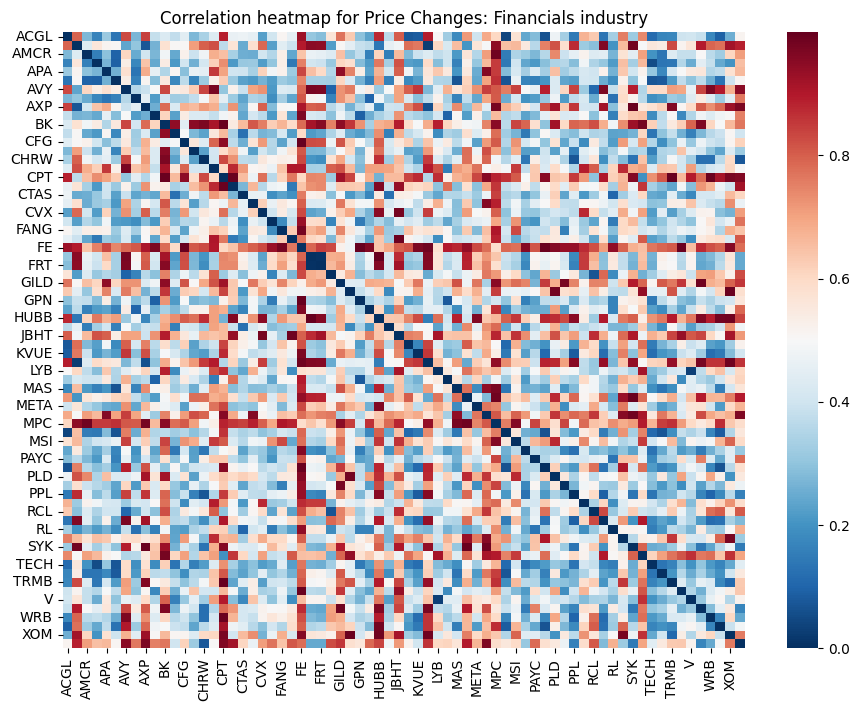

In [38]:
fin = df[df['Industry'] == 'Financials']
fin = fin.drop(columns='Industry', axis=1)
df_price_fin = fin.T
df_price_pct_fin = df_price_fin.pct_change()[1:]

# Modify correlation calculation
price_corr_fin = 1 - abs(df_price_pct_fin.corr())

plt.figure(figsize=(11, 8))
sns.heatmap(price_corr_fin, cmap='RdBu_r').set_title("Correlation heatmap for Price Changes: Financials industry")
plt.show()

In [39]:
fin.shape

(70, 13)

## <b> <font color = #f6308e > Health Care </b> 
##### pharmaceuticals, biotechnology, hospitals, and healthcare services

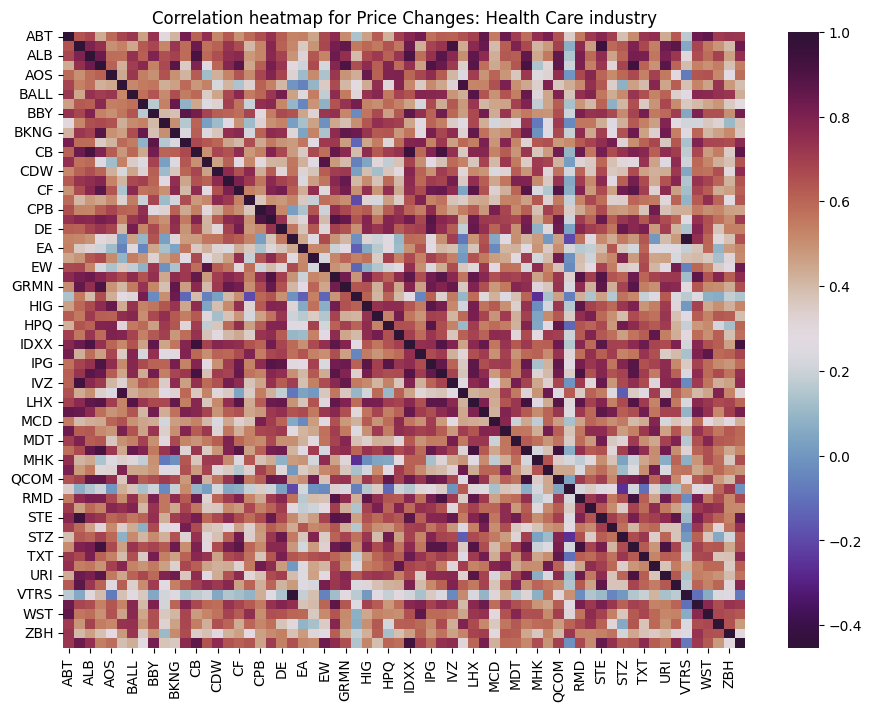

In [40]:
care = df[df['Industry'] == 'Health Care']
care = care.drop(columns= 'Industry', axis = 1)
df_price_care = care.T
df_price_pct_care = df_price_care.pct_change()[1:]

price_corr_care= df_price_pct_care.corr()
plt.figure(figsize=(11,8))
sns.heatmap(price_corr_care, cmap = 'twilight_shifted').set_title("Correlation heatmap for Price Changes: Health Care industry")
plt.show()

## <b> <font color = #f6308e > Industrials </b> 
##### manufacturing, construction, aerospace, defense, and transportation

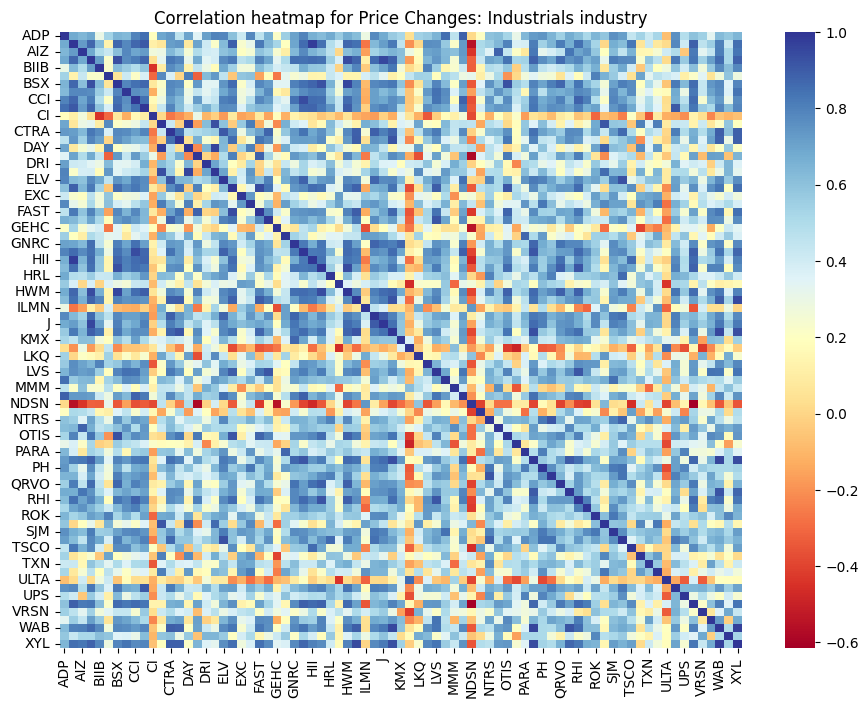

In [41]:
indus = df[df['Industry'] == 'Industrials']
indus = indus.drop(columns= 'Industry', axis = 1)
df_price_indus = indus.T
df_price_pct_indus = df_price_indus.pct_change()[1:]

price_corr_indus = df_price_pct_indus.corr()
plt.figure(figsize=(11,8))
sns.heatmap(price_corr_indus, cmap = 'RdYlBu').set_title("Correlation heatmap for Price Changes: Industrials industry")
plt.show()

## <b> <font color = #f6308e > Materials </b> 
##### production of raw materials and chemicals eg. metals, minerals, and specialty chemicals.

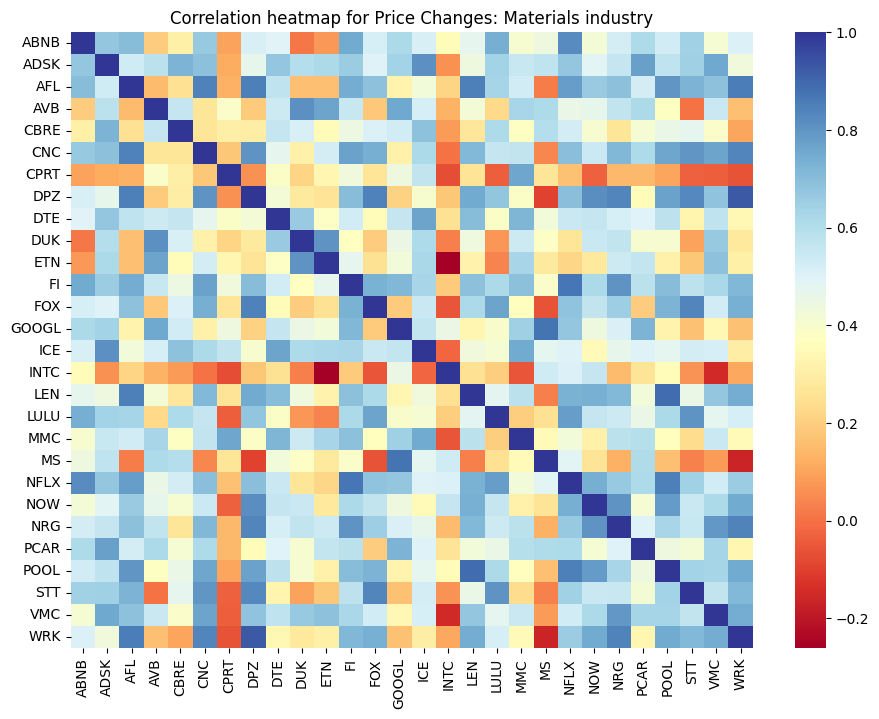

In [42]:
mat = df[df['Industry'] == 'Materials']
mat = mat.drop(columns= 'Industry', axis = 1)
df_price_mat = mat.T
df_price_pct_mat = df_price_mat.pct_change()[1:]

price_corr_mat = df_price_pct_mat.corr()
plt.figure(figsize=(11,8))
sns.heatmap(price_corr_mat, cmap = 'RdYlBu').set_title("Correlation heatmap for Price Changes: Materials industry")
plt.show()

## <b> <font color = #f6308e > Real Estate </b> 
##### residential and commercial properties

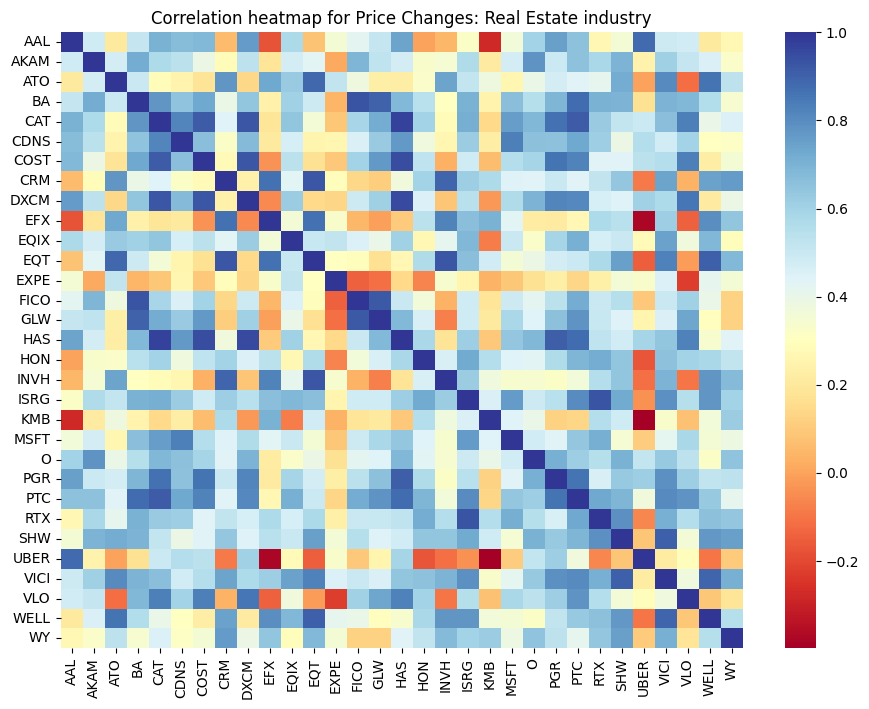

In [43]:
real = df[df['Industry'] == 'Real Estate']
real = real.drop(columns= 'Industry', axis = 1)
df_price_real = real.T
df_price_pct_real = df_price_real.pct_change()[1:]

price_corr_real = df_price_pct_real.corr()
plt.figure(figsize=(11,8))
sns.heatmap(price_corr_real, cmap = 'RdYlBu').set_title("Correlation heatmap for Price Changes: Real Estate industry")
plt.show()

# <b>CLUSTER MAPS

<Figure size 700x500 with 0 Axes>

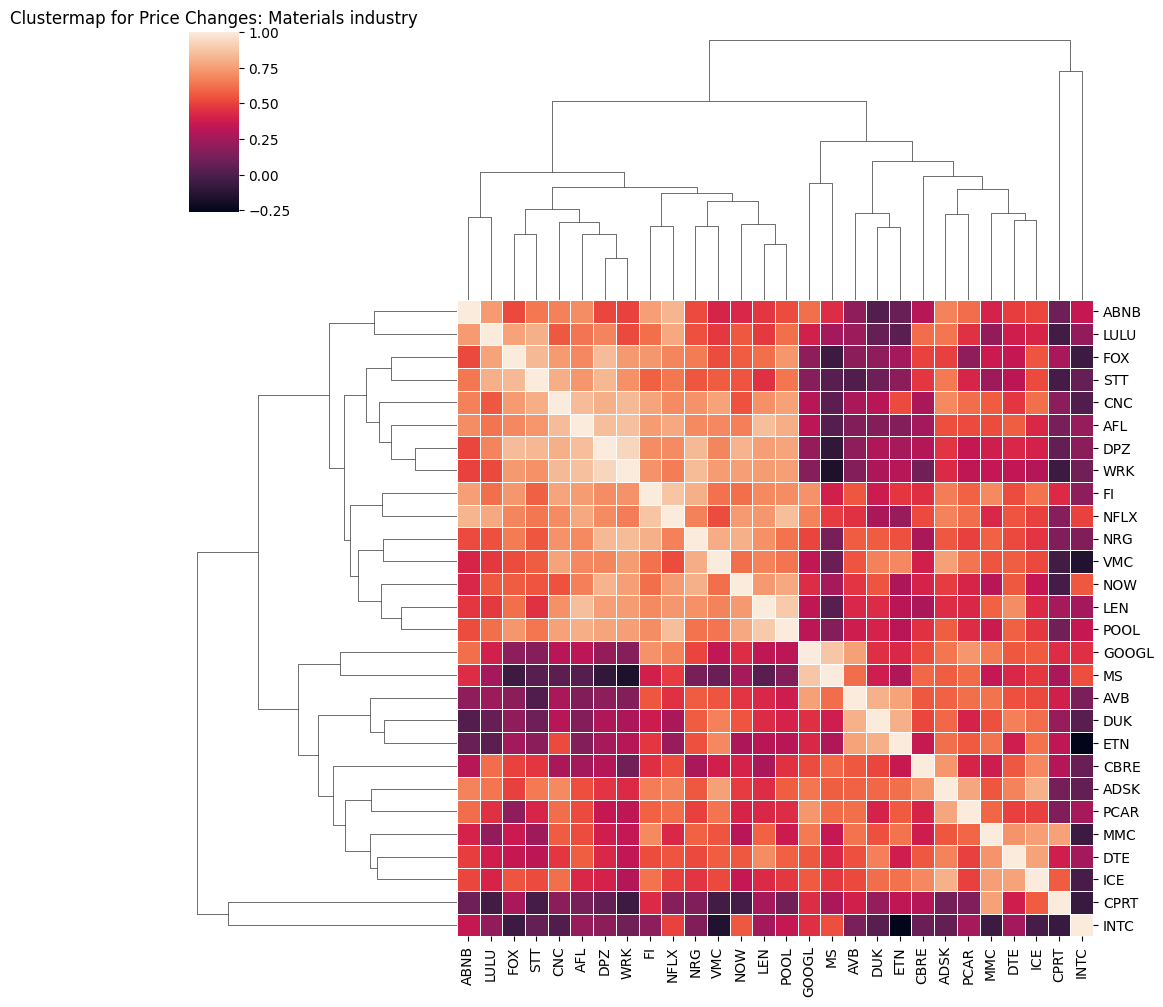

In [44]:
plt.figure(figsize=(7, 5))
sns.clustermap(price_corr_mat, method='average', metric='euclidean', linewidths=0.5, dendrogram_ratio = 0.3)
#dendogram ratio?
plt.title("Clustermap for Price Changes: Materials industry")
plt.show()
#turbo, jet, RdBu

<Figure size 700x1000 with 0 Axes>

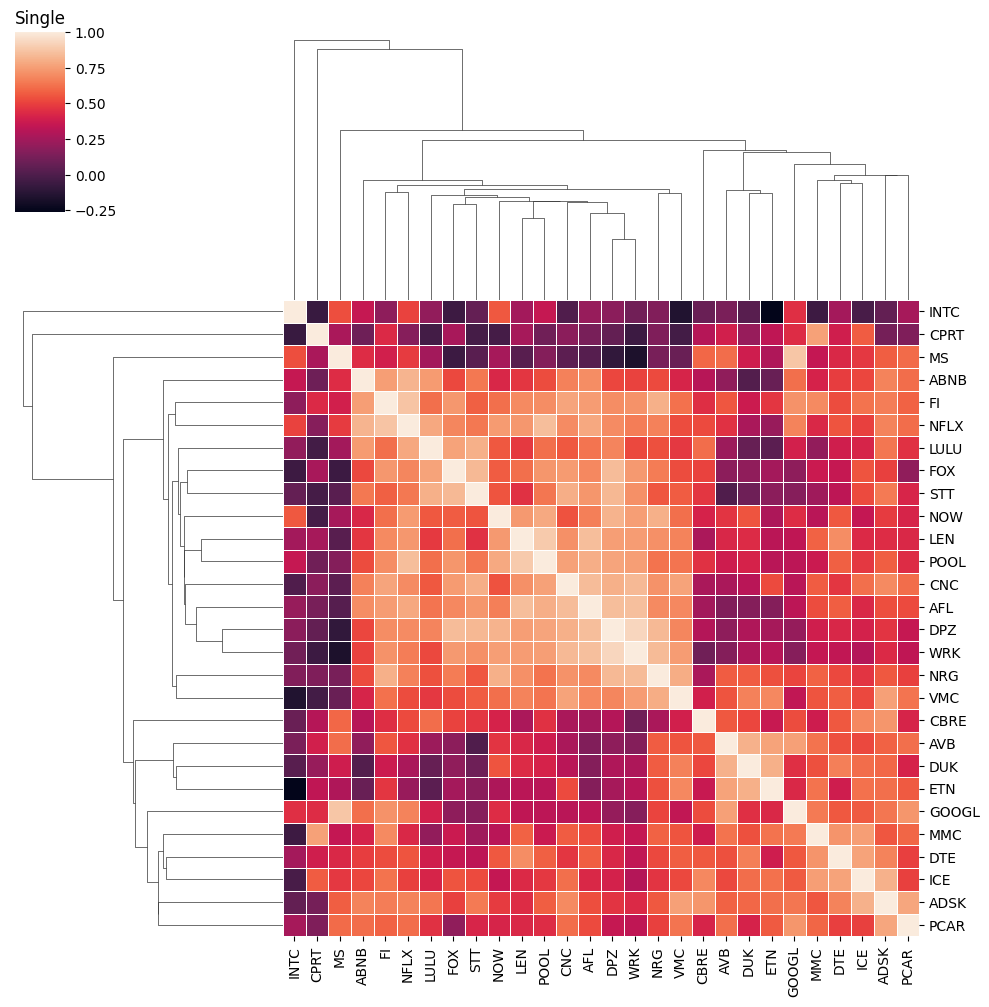

In [45]:
plt.figure(figsize=(7, 10))
sns.clustermap(price_corr_mat, method='single', metric='euclidean', linewidths=0.5, dendrogram_ratio = 0.3)
#dendogram ratio?
plt.title("Single")
plt.show()
#turbo, jet, RdBu

<Figure size 700x500 with 0 Axes>

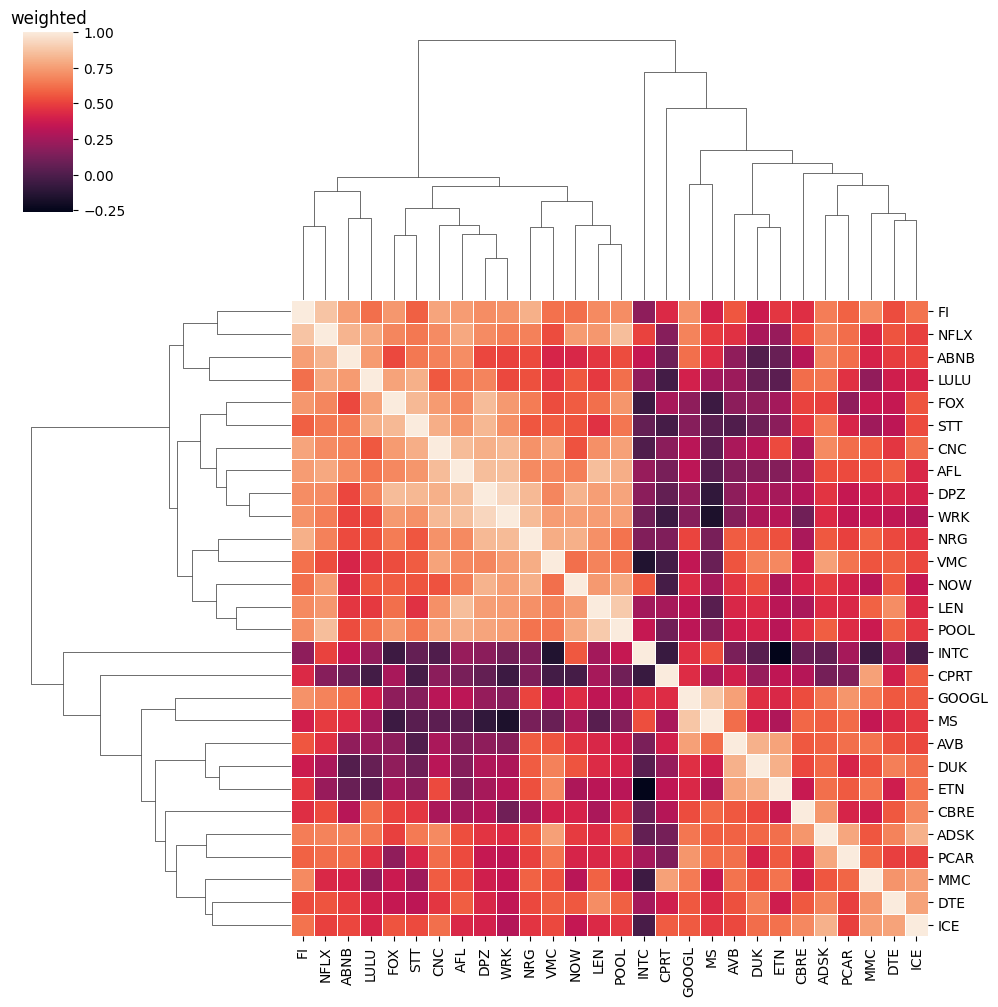

In [46]:
plt.figure(figsize=(7, 5))
sns.clustermap(price_corr_mat, method='weighted', metric='euclidean', linewidths=0.5, dendrogram_ratio = 0.3)
#dendogram ratio?
plt.title("weighted")
plt.show()
#turbo, jet, RdBu

<Figure size 700x500 with 0 Axes>

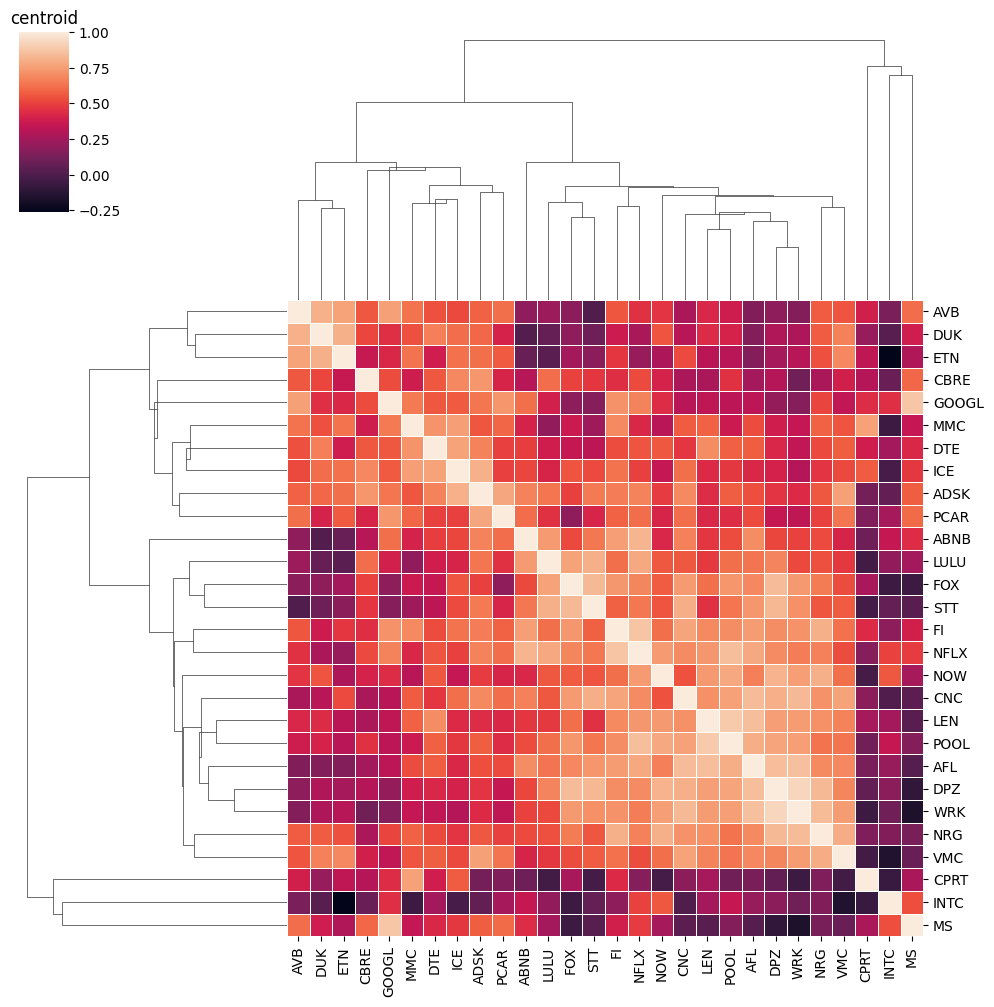

In [47]:
plt.figure(figsize=(7, 5))
sns.clustermap(price_corr_mat, method='centroid', metric='euclidean', linewidths=0.5, dendrogram_ratio = 0.3)
#dendogram ratio?
plt.title("centroid")
plt.show()
#turbo, jet, RdBu

## Graphing Corr Matrix -- IGNORE

In [48]:
! pip3 install networkx
! pip3 install plotly


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [49]:
threshold = .95

links = price_corr.stack().reset_index()
links.columns = ['company1', 'company2', 'correlation']
#made price_corr go from company names as the row and column indeces to company1 being the first column header, company2 beign the second, and correlation as the third

#filtering out any correlations under the threshold that we will set and getting rid of the self loops in the nodes
links_filtered=links.loc[ (links['correlation'] > threshold) & (links['company1'] != links['company2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'company1', 'company2', edge_attr = 'correlation')
nodes = list(G.nodes)
#df_company_names = pd.DataFrame(nodes, columns=['S&P Names'])
nx.set_node_attributes(G, dictionary, 'GICS Sector')

NameError: name 'nx' is not defined